In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, log_loss, roc_auc_score,  precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

from imblearn.pipeline import Pipeline as ImbPipeline
import joblib
import os
import warnings
from typing import Tuple, List, Dict, Set

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 1470
Number of columns: 35


In [4]:
print("Basic Information of the Data Frame Employee attrition.", end="\n\n")
df.info()

Basic Information of the Data Frame Employee attrition.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement       

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df['JobLevel']

0       2
1       2
2       1
3       1
4       1
       ..
1465    2
1466    3
1467    2
1468    2
1469    2
Name: JobLevel, Length: 1470, dtype: int64

In [8]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [9]:
df.loc[(df['Attrition'] == "Yes"), "Attrition"]  =  1
df.loc[(df['Attrition'] == "No"), "Attrition"]  =  0
df['Attrition'] = df['Attrition'].astype('int64')

In [10]:
print("\nUnique Values for Potential Irrelevant Features:")
for col in ['EmployeeCount', 'StandardHours', 'Over18']:
    print(f"{col}: {df[col].nunique()} unique value(s)")


Unique Values for Potential Irrelevant Features:
EmployeeCount: 1 unique value(s)
StandardHours: 1 unique value(s)
Over18: 1 unique value(s)


In [11]:
print(df["EmployeeNumber"].nunique())

1470


In [12]:
irrelevant_features = ['EmployeeCount', 'StandardHours', 'EmployeeNumber', 'Over18']
df = df.drop(columns=irrelevant_features)
print("\nDropped irrelevant features:", irrelevant_features)


Dropped irrelevant features: ['EmployeeCount', 'StandardHours', 'EmployeeNumber', 'Over18']


In [13]:
def feature_type_extraction(df: pd.DataFrame, target: str = "Attrition")  -> Tuple[List]:
    num_cols, cat_cols, exception_cols = [], [], []
    for col in df.columns.values:
        if df[col].dtype in ['int64', 'float'] and col != target:
            num_cols.append(col)
        elif df[col].dtype in ['object'] and col != target:
            cat_cols.append(col)
        else:
            exception_cols.append(col)
    return num_cols, cat_cols, exception_cols
num_features, cat_features, except_features = feature_type_extraction(df)
print("Numeric Columns: ", num_features, "Categorical columns: ", cat_features, "Some Exceptional Columns of different types: ", except_features, sep="\n")

Numeric Columns: 
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Categorical columns: 
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
Some Exceptional Columns of different types: 
['Attrition']


In [14]:
def dataset_outliers(df: pd.DataFrame, num_features: List | np.ndarray | Tuple | Set) -> Dict[str, pd.Series]:
    outliers_dict = {}
    for col in num_features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
        outliers_dict[col] = outliers
    return outliers_dict

outliers_dict = dataset_outliers(df, num_features=num_features)
total_ouliers = 0
for col,  outliers in outliers_dict.items():
    if col != "Attrition":
        total_ouliers += int(df[outliers][col].count())
        print(f"For {col} Ouliers: {df[outliers][col].count()}.")
print("Toal Outliers in dataset: ", total_ouliers)

For Age Ouliers: 0.
For DailyRate Ouliers: 0.
For DistanceFromHome Ouliers: 0.
For Education Ouliers: 0.
For EnvironmentSatisfaction Ouliers: 0.
For HourlyRate Ouliers: 0.
For JobInvolvement Ouliers: 0.
For JobLevel Ouliers: 0.
For JobSatisfaction Ouliers: 0.
For MonthlyIncome Ouliers: 114.
For MonthlyRate Ouliers: 0.
For NumCompaniesWorked Ouliers: 52.
For PercentSalaryHike Ouliers: 0.
For PerformanceRating Ouliers: 226.
For RelationshipSatisfaction Ouliers: 0.
For StockOptionLevel Ouliers: 85.
For TotalWorkingYears Ouliers: 63.
For TrainingTimesLastYear Ouliers: 238.
For WorkLifeBalance Ouliers: 0.
For YearsAtCompany Ouliers: 104.
For YearsInCurrentRole Ouliers: 21.
For YearsSinceLastPromotion Ouliers: 107.
For YearsWithCurrManager Ouliers: 14.
Toal Outliers in dataset:  1024


In [15]:
corr_matrix = df[num_features].corr()
corr_matrix

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


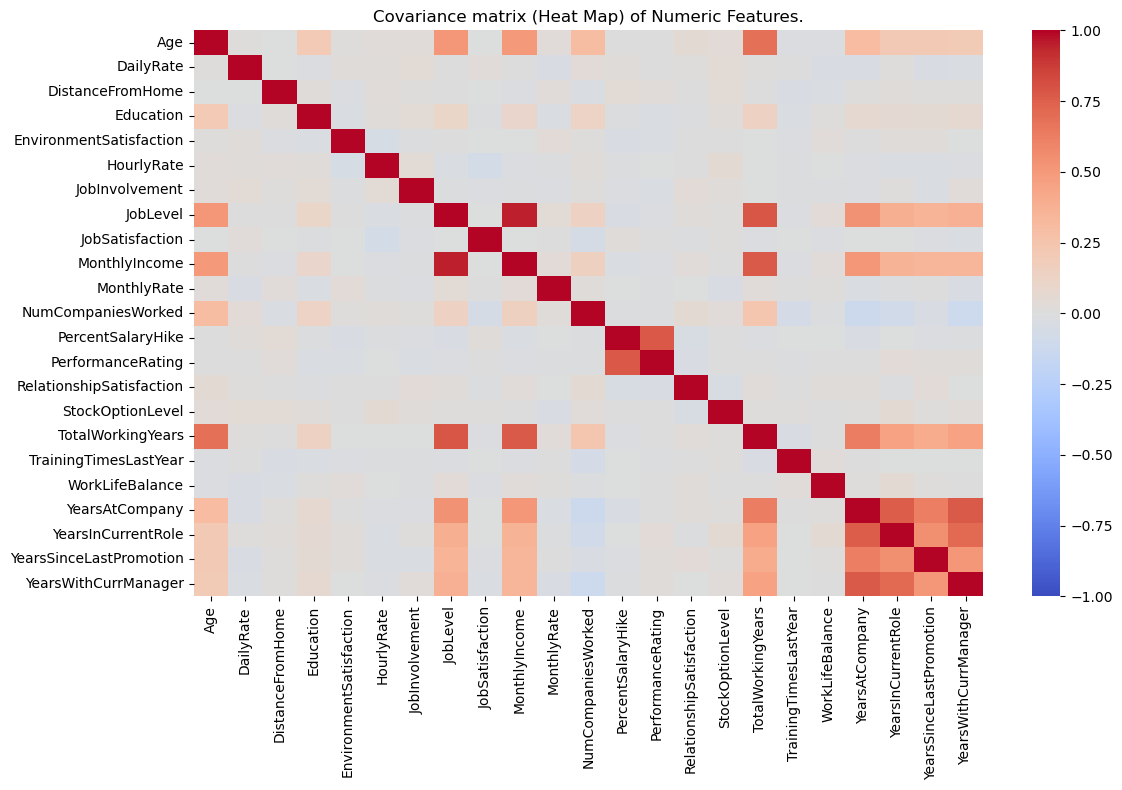

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmax=1, vmin=-1)
plt.title("Covariance matrix (Heat Map) of Numeric Features.")
plt.tight_layout()
plt.show()

In [17]:
df["BusinessTravel"].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [18]:
high_corr = corr_matrix[abs(corr_matrix) > 0.7].stack().reset_index()
high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']].reset_index()
high_corr

,index,level_0,level_1,0
0,8,JobLevel,MonthlyIncome,0.950300
1,9,JobLevel,TotalWorkingYears,0.782208
2,11,MonthlyIncome,JobLevel,0.950300
3,13,MonthlyIncome,TotalWorkingYears,0.772893
4,17,PercentSalaryHike,PerformanceRating,0.773550
5,18,PerformanceRating,PercentSalaryHike,0.773550
6,22,TotalWorkingYears,JobLevel,0.782208
7,23,TotalWorkingYears,MonthlyIncome,0.772893
8,28,YearsAtCompany,YearsInCurrentRole,0.758754
9,29,YearsAtCompany,YearsWithCurrManager,0.769212


In [19]:
df['IncomePerWorkingYear'] = df['MonthlyIncome'] / df['TotalWorkingYears']
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.drop(columns=['JobLevel', 'TotalWorkingYears', 'PerformanceRating', 'YearsWithCurrManager'], axis=1, inplace=True)
df.shape

(1470, 28)

In [20]:
skewness_attr = {}
num_features, cat_features, except_features = feature_type_extraction(df)
for col in num_features:
    skewness_attr[col] = df[col].skew()
skewness_attr = pd.Series(skewness_attr)
filt_skew = (skewness_attr > 0.5) | (skewness_attr < -0.5)
print(skewness_attr[filt_skew])

DistanceFromHome           0.958118
MonthlyIncome              1.369817
NumCompaniesWorked         1.026471
PercentSalaryHike          0.821128
StockOptionLevel           0.968980
TrainingTimesLastYear      0.553124
WorkLifeBalance           -0.552480
YearsAtCompany             1.764529
YearsInCurrentRole         0.917363
YearsSinceLastPromotion    1.984290
IncomePerWorkingYear       2.366739
dtype: float64


In [21]:
num_features, cat_features, except_features = feature_type_extraction(df)
outliers_dict = dataset_outliers(df, num_features=num_features)
for col, outliers in outliers_dict.items():
    if df[outliers][col].count() > 0 and col != "Attrition":
        df[f"Log{col}"] = np.log1p(df[col]) 
for col in skewness_attr[filt_skew].index:
    if not col.startswith('Log') and col not in ["WorkLifeBalance"]:
        df[f"Log{col}"] = np.log1p(df[col])

In [22]:
for col in df.columns.values:
    if col.startswith("Log"):
        org_col = col[3:]
        print(f"Column: {org_col}\n: {df[[col, org_col]].corr()}")

Column: MonthlyIncome
:                   LogMonthlyIncome  MonthlyIncome
LogMonthlyIncome          1.000000       0.944292
MonthlyIncome             0.944292       1.000000
Column: NumCompaniesWorked
:                        LogNumCompaniesWorked  NumCompaniesWorked
LogNumCompaniesWorked               1.000000            0.951114
NumCompaniesWorked                  0.951114            1.000000
Column: StockOptionLevel
:                      LogStockOptionLevel  StockOptionLevel
LogStockOptionLevel             1.000000          0.975786
StockOptionLevel                0.975786          1.000000
Column: TrainingTimesLastYear
:                           LogTrainingTimesLastYear  TrainingTimesLastYear
LogTrainingTimesLastYear                  1.000000               0.949541
TrainingTimesLastYear                     0.949541               1.000000
Column: YearsAtCompany
:                    LogYearsAtCompany  YearsAtCompany
LogYearsAtCompany           1.000000        0.896147
YearsAtCompan

In [23]:
for col in df.columns.values:
    if col.startswith("Log"):
        org_col = col[3:]
        if org_col != "YearsAtCompany":
            df.drop(org_col, axis=1, inplace=True)

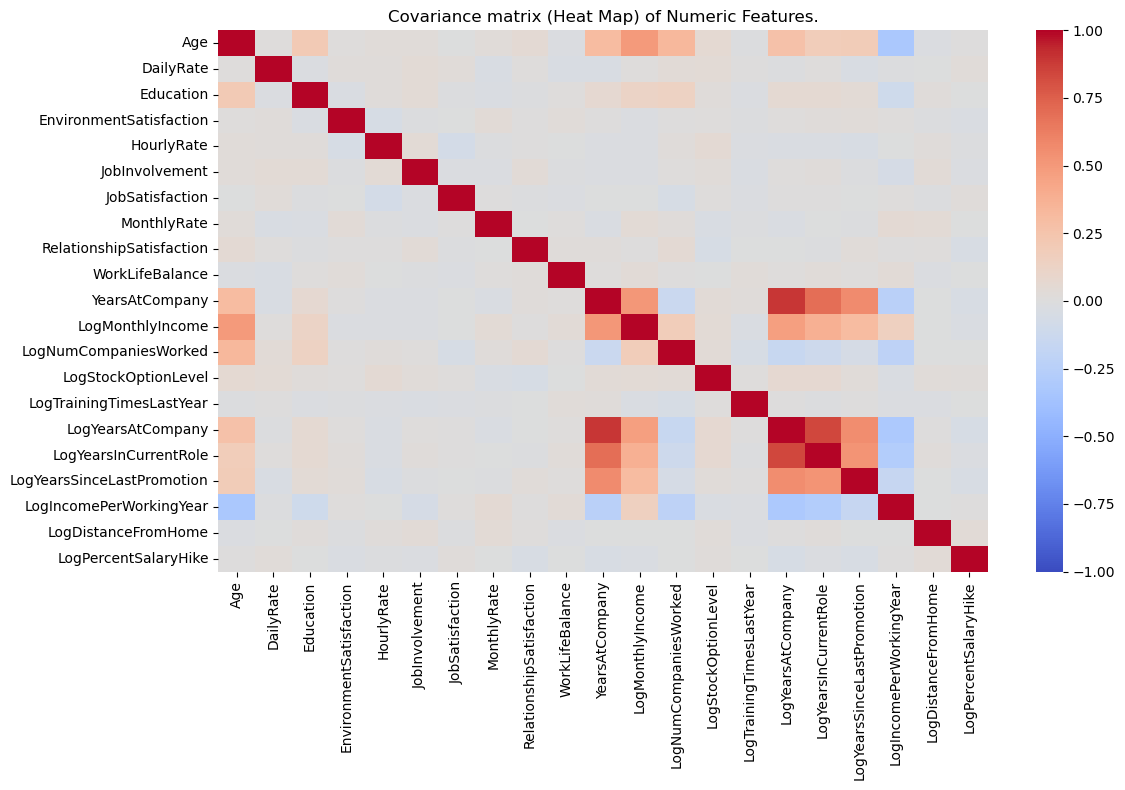

In [24]:
num_features, cat_features, except_features = feature_type_extraction(df)
corr_matrix = df[num_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmax=1, vmin=-1)
plt.title("Covariance matrix (Heat Map) of Numeric Features.")
plt.tight_layout()
plt.show()

In [25]:
high_corr = corr_matrix[abs(corr_matrix) > 0.7].stack().reset_index()
high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']].reset_index()
high_corr

,index,level_0,level_1,0
0,11,YearsAtCompany,LogYearsAtCompany,0.896147
1,16,LogYearsAtCompany,YearsAtCompany,0.896147
2,18,LogYearsAtCompany,LogYearsInCurrentRole,0.836245
3,19,LogYearsInCurrentRole,LogYearsAtCompany,0.836245


In [26]:
for col in cat_features:
    print("Columns: ", col, df[col].nunique(), sep='\n')

Columns: 
BusinessTravel
3
Columns: 
Department
3
Columns: 
EducationField
6
Columns: 
Gender
2
Columns: 
JobRole
9
Columns: 
MaritalStatus
3
Columns: 
OverTime
2


In [27]:
print(df.BusinessTravel.value_counts(), df['EducationField'].value_counts(), df['JobRole'].value_counts(), df['MaritalStatus'].value_counts(), sep='\n\n')

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


In [28]:
df['SatisfactionProduct'] = df['JobSatisfaction'] * df['WorkLifeBalance']
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 30, 40, 50 ,60], labels=['Young', 'Mid', 'Senior', 'Veteran'])
df['PromotionSatisfaction'] = df['LogYearsSinceLastPromotion'] * df['JobSatisfaction']
df['OverTimeWorkLife'] = df['OverTime'].map({'Yes': 1, 'No': 0}) * df['WorkLifeBalance']
df['TenureGroup'] = pd.cut(df['YearsAtCompany'], bins=[0, 2, 5, 10, 40], labels=['New', 'Short', 'Medium', 'Long'])
df.drop('YearsAtCompany', axis=1, inplace =True)
ordinal_features = ["BusinessTravel"]
ordinal_categories = [["Non-Travel", "Travel_Rarely", "Travel_Frequently"]]

In [29]:
num_features, cat_features, except_features = feature_type_extraction(df)
del cat_features[cat_features.index('BusinessTravel')]

In [30]:
numeric_transformer = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy='mean')),
        ("scaler", StandardScaler()),
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ("onehot", OneHotEncoder(drop='first', sparse_output=False)),
        #("scaler", StandardScaler())
    ]
)

ordinal_transformer = Pipeline(
    steps=[
        ("ordinal", OrdinalEncoder(categories=ordinal_categories))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features),
        ("ord", ordinal_transformer, ordinal_features),
    ]
)

In [31]:
pipeline = ImbPipeline(
    steps=[
        ("preprocessor", preprocessor),
       # ("smote", SMOTE(random_state=100)),
        ("classifier", LogisticRegression(verbose=0, random_state=100))
    ]
)

param_grid = {
    "classifier__C": [0.01, 0.1, 1.0, 5.0, 10],
    "classifier__max_iter": [100, 150, 200, 250],
    "classifier__solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    "classifier__class_weight": [None, 'balanced', {0: 1, 1: 3}, {0: 1, 1: 5}],
    "classifier__penalty": ['l1', 'l2'],
}

grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring='f1',
    n_jobs=-1,
    cv=5,
    verbose=1,
)

In [32]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

In [33]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


/home/nemo/.conda/envs/ds_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nemo/.conda/envs/ds_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nemo/.conda/envs/ds_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nemo/.conda/envs/ds_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nemo/.conda/envs/ds_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nemo/.conda/envs/ds_env/

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'DailyRate',
                                                                          'Education',
                                                                          'EnvironmentSatisfaction',
                                                                          'HourlyRate',
                                                                          'JobInvolvement',
                                                                          'JobSatisfaction',
                                                                          'MonthlyRate',
                                                                          'RelationshipSatisfaction',
                                                                          'WorkLifeBalance',
                                                                          'LogMonthlyInc...
                                        LogisticRegression(random_state=100))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1.0, 5.0, 10],
                         'classifier__class_weight': [None, 'balanced',
                                                      {0: 1, 1: 3},
                                                      {0: 1, 1: 5}],
                         'classifier__max_iter': [100, 150, 200, 250],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['lbfgs', 'liblinear',
                                                'newton-cg', 'newton-cholesky',
                                                'sag', 'saga']},
             scoring='f1', verbose=1)

In [34]:
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation F1 score:", grid_search.best_score_)
print("ROC-AUC Score: ", roc_auc_score(y_train, grid_search.predict_proba(X_train)[:, 1]))


Best Parameters: {'classifier__C': 0.01, 'classifier__class_weight': {0: 1, 1: 3}, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best Cross-Validation F1 score: 0.5909706211436564
ROC-AUC Score:  0.8578733852887799


In [35]:
y_pred = grid_search.predict(X_test)
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
print(f"ROC-AUC score: {roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])}")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Log Loss: {log_loss(y_test, grid_search.predict_proba(X_test)[:, 1])}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       247
           1       0.56      0.66      0.61        47

    accuracy                           0.86       294
   macro avg       0.75      0.78      0.76       294
weighted avg       0.87      0.86      0.87       294

ROC-AUC score: 0.858902575587906
Accuracy Score: 0.8639455782312925
Log Loss: 0.40444307651003986


In [57]:
y_scores = grid_search.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
f1_scores = 2 * precisions * recalls / (precisions + recalls)
optim_threshold = thresholds[np.argmax(f1_scores)]
print("\nOptimal Threshold:", optim_threshold)
y_pred_adjusted = (y_scores >= optim_threshold).astype(int)
print("\nLogistic Regression with Adjusted Threshold:")
print(classification_report(y_test, y_pred_adjusted))


Optimal Threshold: 0.5356902911495744

Logistic Regression with Adjusted Threshold:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       247
           1       0.64      0.64      0.64        47

    accuracy                           0.88       294
   macro avg       0.78      0.78      0.78       294
weighted avg       0.88      0.88      0.88       294



In [37]:
feature_names = grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
feature_names

array(['num__Age', 'num__DailyRate', 'num__Education',
       'num__EnvironmentSatisfaction', 'num__HourlyRate',
       'num__JobInvolvement', 'num__JobSatisfaction', 'num__MonthlyRate',
       'num__RelationshipSatisfaction', 'num__WorkLifeBalance',
       'num__LogMonthlyIncome', 'num__LogNumCompaniesWorked',
       'num__LogStockOptionLevel', 'num__LogTrainingTimesLastYear',
       'num__LogYearsAtCompany', 'num__LogYearsInCurrentRole',
       'num__LogYearsSinceLastPromotion', 'num__LogIncomePerWorkingYear',
       'num__LogDistanceFromHome', 'num__LogPercentSalaryHike',
       'num__SatisfactionProduct', 'num__PromotionSatisfaction',
       'num__OverTimeWorkLife', 'cat__Department_Research & Development',
       'cat__Department_Sales', 'cat__EducationField_Life Sciences',
       'cat__EducationField_Marketing', 'cat__EducationField_Medical',
       'cat__EducationField_Other',
       'cat__EducationField_Technical Degree', 'cat__Gender_Male',
       'cat__JobRole_Human Resources

In [38]:
coef = grid_search.best_estimator_.named_steps['classifier'].coef_[0]
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
print("\nTop 10 Features by Coefficient: ")
print(coef_df.sort_values(by='Abs_Coefficient', ascending=False).head(10))


Top 10 Features by Coefficient: 
                               Feature  Coefficient  Abs_Coefficient
22               num__OverTimeWorkLife     0.449890         0.449890
10               num__LogMonthlyIncome    -0.330883         0.330883
42                 ord__BusinessTravel     0.319322         0.319322
5                  num__JobInvolvement    -0.281326         0.281326
3         num__EnvironmentSatisfaction    -0.256410         0.256410
41                   cat__OverTime_Yes     0.249238         0.249238
12            num__LogStockOptionLevel    -0.230133         0.230133
18            num__LogDistanceFromHome     0.220058         0.220058
6                 num__JobSatisfaction    -0.207299         0.207299
32  cat__JobRole_Laboratory Technician     0.193289         0.193289


In [44]:
joblib.dump(grid_search.best_estimator_, 'attrition_model.pkl')
print("Model Saved as attrition_model.pkl")

Model Saved as attrition_model.pkl


In [59]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import log_loss, roc_auc_score, classification_report

# Define features
Input_features = [
    'Age', 'BusinessTravel', 'DailyRate', 'Department', 'Education', 'EducationField',
    'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobRole',
    'JobSatisfaction', 'MaritalStatus', 'MonthlyRate', 'OverTime', 'RelationshipSatisfaction',
    'WorkLifeBalance', 'LogMonthlyIncome', 'LogNumCompaniesWorked', 'LogStockOptionLevel',
    'LogTrainingTimesLastYear', 'LogYearsAtCompany', 'LogYearsInCurrentRole',
    'LogYearsSinceLastPromotion', 'LogIncomePerWorkingYear', 'LogDistanceFromHome',
    'LogPercentSalaryHike', 'SatisfactionProduct', 'AgeGroup', 'PromotionSatisfaction',
    'OverTimeWorkLife', 'TenureGroup'
]

numeric_features = [
    'Age', 'DailyRate', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
    'JobInvolvement', 'JobSatisfaction', 'MonthlyRate', 'RelationshipSatisfaction',
    'WorkLifeBalance', 'LogMonthlyIncome', 'LogNumCompaniesWorked', 'LogStockOptionLevel',
    'LogTrainingTimesLastYear', 'LogIncomePerWorkingYear', 'LogDistanceFromHome',
    'LogPercentSalaryHike', 'SatisfactionProduct', 'PromotionSatisfaction', 'OverTimeWorkLife'
]
categorical_features = [
    'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime',
    'AgeGroup', 'TenureGroup'
]
ordinal_features = ['BusinessTravel']

# Load the model
model = joblib.load('attrition_model.pkl')
print("Model loaded successfully:", model)

# Load or create new data (replace with your data source)
# Example: Manual creation of one sample
new_data = pd.DataFrame({
    'Age': [35],
    'BusinessTravel': ['Travel_Rarely'],
    'DailyRate': [800],
    'Department': ['Sales'],
    'Education': [3],
    'EducationField': ['Marketing'],
    'EnvironmentSatisfaction': [3],
    'Gender': ['Male'],
    'HourlyRate': [70],
    'JobInvolvement': [3],
    'JobRole': ['Sales Executive'],
    'JobSatisfaction': [4],
    'MaritalStatus': ['Married'],
    'MonthlyRate': [15000],
    'OverTime': ['No'],
    'RelationshipSatisfaction': [4],
    'WorkLifeBalance': [3],
    'MonthlyIncome': [6000],
    'NumCompaniesWorked': [2],
    'StockOptionLevel': [1],
    'TrainingTimesLastYear': [3],
    'YearsAtCompany': [5],
    'YearsInCurrentRole': [4],
    'YearsSinceLastPromotion': [1],
    'IncomePerWorkingYear': [6000 / (10 + 1)],
    'DistanceFromHome': [10],
    'PercentSalaryHike': [15]
})

# Add engineered features
for col in ['MonthlyIncome', 'NumCompaniesWorked', 'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'IncomePerWorkingYear', 'DistanceFromHome', 'PercentSalaryHike']:
    new_data[f'Log{col}'] = np.log1p(new_data[col])
new_data['SatisfactionProduct'] = new_data['JobSatisfaction'] * new_data['WorkLifeBalance']
new_data['PromotionSatisfaction'] = new_data['LogYearsSinceLastPromotion'] * new_data['JobSatisfaction']
new_data['OverTimeWorkLife'] = new_data['OverTime'].map({'Yes': 1, 'No': 0}) * new_data['WorkLifeBalance']
new_data['AgeGroup'] = pd.cut(new_data['Age'], bins=[18, 30, 40, 50, 60], labels=['Young', 'Mid', 'Senior', 'Veteran'])
new_data['TenureGroup'] = pd.cut(new_data['YearsAtCompany'], bins=[0, 2, 5, 10, 40], labels=['New', 'Short', 'Medium', 'Long'])

# Ensure correct feature order
new_data = new_data[Input_features]

# Handle missing values (if any)
print("Missing values in new data:", new_data.isnull().sum())
for col in numeric_features:
    new_data[col].fillna(new_data[col].mean(), inplace=True)
for col in categorical_features + ordinal_features:
    new_data[col].fillna(new_data[col].mode()[0], inplace=True)

# Verify data types
print("\nData types:")
print(new_data.dtypes)

# Make predictions
predictions = model.predict(new_data)
probabilities = model.predict_proba(new_data)
prob_yes = probabilities[:, 1]

# Optional: Apply custom threshold
optimal_threshold = optim_threshold  # Replace with your optimal threshold from threshold tuning
custom_predictions = (prob_yes >= optimal_threshold).astype(int)

# Print results
print("\nPredictions (0=No, 1=Yes):", predictions)
print("Probabilities ([No, Yes]):", probabilities)
print("Probability of Attrition=Yes:", prob_yes)
print("Custom Threshold Predictions (0=No, 1=Yes):", custom_predictions)

# Save predictions
new_data['Predicted_Attrition'] = predictions
new_data['Probability_Attrition_Yes'] = prob_yes
new_data['Custom_Predicted_Attrition'] = custom_predictions
new_data.to_csv('new_data_with_predictions.csv', index=False)
print("\nPredictions saved to 'new_data_with_predictions.csv'")

Model loaded successfully: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement',
                                                   'JobSatisfaction',
                                                   'MonthlyRate',
                                                   'RelationshipSatisfact

In [53]:
model.feature_names_in_

array(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyRate', 'OverTime',
       'RelationshipSatisfaction', 'WorkLifeBalance', 'LogMonthlyIncome',
       'LogNumCompaniesWorked', 'LogStockOptionLevel',
       'LogTrainingTimesLastYear', 'LogYearsAtCompany',
       'LogYearsInCurrentRole', 'LogYearsSinceLastPromotion',
       'LogIncomePerWorkingYear', 'LogDistanceFromHome',
       'LogPercentSalaryHike', 'SatisfactionProduct', 'AgeGroup',
       'PromotionSatisfaction', 'OverTimeWorkLife', 'TenureGroup'],
      dtype=object)